# Video Game Store Analysis

The video game store Ice sells video games across the world, they collect date on each game such as the total sales per region and user reviews. Our aim here is to identify pattens that determine whether a game has succeeded after it's release and whether there has been enough sales. The analysis will help Ice games to modify their marketing and sales tactics around games consoles as well as helping the procurement teams decide which games and consoles bring in the most sales.

Throughout the analysis we will test the following hypothesis:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

## Objective

The objective of this data analysis project is to gain a deeper understanding of the factors that contribute to the success of video games and their sales performance. By analyzing the available data, we aim to answer crucial questions such as: 
- What characteristics of a game make it more likely to succeed? 
- Which platforms are leading in sales and which ones are declining? 
- How do user and professional reviews impact sales? 
- Which genres are the most profitable?

Through our analysis, we will explore various aspects of the data, including historical game sales, user and expert reviews, genres, platforms, and ratings. By uncovering key insights, we will enable Ice to make data-driven decisions, such as identifying potential big winners, planning targeted advertising campaigns, and optimizing their game and console procurement strategies.

Ultimately, the goal of this project is to empower Ice with actionable insights that will enhance their understanding of the video game market and enable them to make informed decisions to maximize their sales and profitability. By leveraging the power of data analysis, we will help Ice stay ahead in the dynamic and competitive video game industry.

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import markdown as m

In [2]:
# reading in the data
df = pd.read_csv("/datasets/games.csv")

# Data Preparation

Get a summary of the data and understand first what we are looking at and if there are any errors and missing values.

In [3]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df = df.rename(columns={'year_of_release': 'release_year'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df.describe(include='object')

name platform   genre user_score rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

In [9]:
df.describe()

release_year      na_sales      eu_sales      jp_sales   other_sales  \
count  16446.000000  16715.000000  16715.000000  16715.000000  16715.000000   
mean    2006.484616      0.263377      0.145060      0.077617      0.047342   
std        5.877050      0.813604      0.503339      0.308853      0.186731   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.030000   
max     2016.000000     41.360000     28.960000     10.220000     10.570000   

       critic_score  
count   8137.000000  
mean      68.967679  
std       13.938165  
min       13.000000  
25%       60.000000  
50%       71.000000  
75%       79.000000  
max       98.000000

The majority of the scores and rating columns are missing there are other values in name, release_year and genre that are missing. Now we will observe the first three columns

## Missing Values & Fixing

In [10]:
df.isna().mean()

name            0.000120
platform        0.000000
release_year    0.016093
genre           0.000120
na_sales        0.000000
eu_sales        0.000000
jp_sales        0.000000
other_sales     0.000000
critic_score    0.513192
user_score      0.400897
rating          0.404786
dtype: float64

### Names and genres

In [11]:
top_game = df[df.name == 'Need for Speed: Most Wanted']
top_game.head(5)

name platform  release_year   genre  na_sales  \
253   Need for Speed: Most Wanted      PS2        2005.0  Racing      2.03   
523   Need for Speed: Most Wanted      PS3        2012.0  Racing      0.71   
1190  Need for Speed: Most Wanted     X360        2012.0  Racing      0.62   
1591  Need for Speed: Most Wanted     X360        2005.0  Racing      1.00   
1998  Need for Speed: Most Wanted       XB        2005.0  Racing      0.53   

      eu_sales  jp_sales  other_sales  critic_score user_score rating  
253       1.79      0.08         0.47          82.0        9.1      T  
523       1.46      0.06         0.58           NaN        NaN    NaN  
1190      0.78      0.01         0.15          83.0        8.5      T  
1591      0.13      0.02         0.10          83.0        8.5      T  
1998      0.46      0.00         0.05          83.0        8.8      T

In [12]:
top_game['platform'].unique()

array(['PS2', 'PS3', 'X360', 'XB', 'PSV', 'GC', 'PC', 'WiiU', 'DS', 'GBA'],
      dtype=object)

In [13]:
#missing names
missing_names = df[df['name'].isna()]
missing_names

name platform  release_year genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN        1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN        1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [14]:
gen_platform = df[df['platform'] == 'GEN']
gen_platform.head(5)

name platform  release_year     genre  na_sales  \
145  Sonic the Hedgehog 2      GEN        1992.0  Platform      4.47   
257    Sonic the Hedgehog      GEN        1991.0  Platform      3.03   
564         Mortal Kombat      GEN        1992.0  Fighting      1.95   
588       Streets of Rage      GEN        1990.0    Action      1.86   
659                   NaN      GEN        1993.0       NaN      1.78   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
145      1.20      0.16         0.19           NaN        NaN    NaN  
257      0.91      0.26         0.13           NaN        NaN    NaN  
564      0.63      0.00         0.09           NaN        NaN    NaN  
588      0.55      0.11         0.08           NaN        NaN    NaN  
659      0.53      0.00         0.08           NaN        NaN    NaN

#### Missing values notes

Missing values in name are 1993 generation consoles, we have no idea what the games are or the genre. All we have is the console data and as there is no review data either will drop these two rows from the dataframe.

### Release year

I rectified the release year column, allowing it to be used in our analysis. Since there was no option to fill in the data, it remained unpopulated.

In [15]:
release_year = df[df['release_year'].isna()]

In [16]:
df['release_year'].isna().sum()

269

In [17]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

In [18]:
# check updated figures
df.isna().mean()

name            0.000120
platform        0.000000
release_year    0.016093
genre           0.000120
na_sales        0.000000
eu_sales        0.000000
jp_sales        0.000000
other_sales     0.000000
critic_score    0.513192
user_score      0.400897
rating          0.404786
dtype: float64

### Scores and Ratings
We will not fill in the missing values, but we will ensure that the values are numeric so that we can analysis the data properly.

In [19]:
scores_ratings = df[(df['critic_score'].isna()) & (df['user_score'].isna()) & df['rating'].isna()]
user_scores = df[(df['user_score'].isna())]
ratings = df[(df['rating'].isna())]
critic_score = df[(df['critic_score'].isna())]

In [20]:
user_scores.sample(5)

name platform  release_year  \
13928                     Don Bradman Cricket 14     XOne        2015.0   
7309     Nintendo Presents: Crossword Collection       DS        2009.0   
4288         Phantasy Star Online Episode I & II       GC        2002.0   
11706                               Majin Tensei     SNES        1994.0   
5979   Atelier Iris 3: Grand Phantasm (US Sales)      PS2        2006.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
13928        Sports      0.00      0.04      0.00         0.00           NaN   
7309         Puzzle      0.00      0.19      0.00         0.02           NaN   
4288   Role-Playing      0.23      0.06      0.16         0.01           NaN   
11706  Role-Playing      0.00      0.00      0.08         0.00           NaN   
5979   Role-Playing      0.14      0.11      0.00         0.04           NaN   

      user_score rating  
13928        NaN    NaN  
7309         NaN    NaN  
4288         NaN    NaN  
11706        NaN    NaN  
5979         NaN    NaN

In [21]:
ratings.sample(5)

name platform  release_year  \
2510                 Killer Instinct Gold      N64        1996.0   
13097         Summon Night X: Tears Crown       DS        2009.0   
400    The Legend of Zelda: Majora's Mask      N64        2000.0   
13216           Smart Kid's Party Fun Pak       DS        2008.0   
7111                         Jersey Devil       PS        1997.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
2510       Fighting      0.61      0.19      0.00         0.01           NaN   
13097  Role-Playing      0.00      0.00      0.05         0.00           NaN   
400          Action      1.90      0.67      0.73         0.06           NaN   
13216          Misc      0.05      0.00      0.00         0.00           NaN   
7111       Platform      0.13      0.09      0.00         0.01           NaN   

      user_score rating  
2510         NaN    NaN  
13097        NaN    NaN  
400          NaN    NaN  
13216        tbd    NaN  
7111         NaN    NaN

In [22]:
critic_score.sample(5)

name platform  \
14205  Simple DS Series Vol. 8: The Kanshikikan - Kin...       DS   
4646           Zack & Wiki: Quest for Barbaros' Treasure      Wii   
9161                                      Gallop & Ride!      Wii   
12204                 Command & Conquer 3: Tiberium Wars       PC   
15809                           Ultraman Star Chronicles      PSP   

       release_year      genre  na_sales  eu_sales  jp_sales  other_sales  \
14205        2006.0  Adventure      0.00      0.00      0.03         0.00   
4646         2007.0  Adventure      0.18      0.16      0.03         0.04   
9161         2008.0     Sports      0.13      0.00      0.00         0.01   
12204        2007.0   Strategy      0.00      0.06      0.00         0.01   
15809        2013.0   Strategy      0.00      0.00      0.02         0.00   

       critic_score user_score rating  
14205           NaN        NaN    NaN  
4646            NaN        NaN    NaN  
9161            NaN        NaN    NaN  
12204           NaN        NaN    NaN  
15809           NaN        NaN    NaN

In [23]:
ratings.head(5)

name platform  release_year         genre  na_sales  \
1          Super Mario Bros.      NES        1985.0      Platform     29.08   
4   Pokemon Red/Pokemon Blue       GB        1996.0  Role-Playing     11.27   
5                     Tetris       GB        1989.0        Puzzle     23.20   
9                  Duck Hunt      NES        1984.0       Shooter     26.93   
10                Nintendogs       DS        2005.0    Simulation      9.05   

    eu_sales  jp_sales  other_sales  critic_score user_score rating  
1       3.58      6.81         0.77           NaN        NaN    NaN  
4       8.89     10.22         1.00           NaN        NaN    NaN  
5       2.26      4.22         0.58           NaN        NaN    NaN  
9       0.63      0.28         0.47           NaN        NaN    NaN  
10     10.95      1.93         2.74           NaN        NaN    NaN

In [24]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['rating'] = df['rating'].fillna('unknown')

In [25]:
df['rating'].isna().sum()

0

In [26]:
df['critic_score'].isna().sum()

8578

In [27]:
df.sample(10)

name platform  \
10948                             The Revenge of Shinobi      GBA   
13136  SpongeBob SquarePants: Plankton's Robotic Revenge     WiiU   
15450                                            F1 2002      GBA   
7063                                             Alundra       PS   
2816   Naruto Shippuden: Ultimate Ninja Storm Generat...      PS3   
12152                                     Ninja Warriors     SNES   
8952                      Charm Girls Club: Pajama Party      Wii   
10657           Marvel vs. Capcom: Clash of Super Heroes       DC   
9676                          Diner Dash: Sizzle & Serve      PSP   
1801            Naruto Shippuden: Ultimate Ninja Storm 4      PS4   

       release_year         genre  na_sales  eu_sales  jp_sales  other_sales  \
10948        2002.0      Platform      0.07      0.02      0.00         0.00   
13136        2013.0       Shooter      0.00      0.05      0.00         0.00   
15450        2002.0        Racing      0.01      0.01      0.00         0.00   
7063         1997.0  Role-Playing      0.13      0.09      0.00         0.01   
2816         2012.0      Fighting      0.27      0.24      0.14         0.08   
12152        1993.0        Action      0.00      0.00      0.07         0.00   
8952         2009.0          Misc      0.14      0.00      0.00         0.01   
10657        1999.0      Fighting      0.00      0.00      0.10         0.00   
9676         2007.0        Puzzle      0.11      0.00      0.00         0.01   
1801         2016.0      Fighting      0.41      0.45      0.11         0.17   

       critic_score user_score   rating  
10948          51.0        tbd        E  
13136           NaN        6.2     E10+  
15450           NaN        tbd        E  
7063           86.0          9        T  
2816           74.0        7.1        T  
12152           NaN        NaN  unknown  
8952            NaN        tbd        E  
10657           NaN        NaN  unknown  
9676            NaN        NaN  unknown  
1801           79.0        8.2        T

In [28]:
df['user_score'].isna().sum()

6701

In [29]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

## Creating company columns

Subsequently, I added supplementary columns based on the available data to ascertain the release dates of platforms.

In [30]:
df['platform_release'] = df.groupby('platform')['release_year'].transform(min)

In [31]:
df.isna().mean()

name                0.000120
platform            0.000000
release_year        0.016093
genre               0.000120
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score        0.513192
user_score          0.545917
rating              0.000000
platform_release    0.000000
dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16715 non-null  object 
 2   release_year      16446 non-null  float64
 3   genre             16713 non-null  object 
 4   na_sales          16715 non-null  float64
 5   eu_sales          16715 non-null  float64
 6   jp_sales          16715 non-null  float64
 7   other_sales       16715 non-null  float64
 8   critic_score      8137 non-null   float64
 9   user_score        7590 non-null   float64
 10  rating            16715 non-null  object 
 11  platform_release  16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


### Categorisation into smaller categories of companies

In [33]:
## Add Platform Company column
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [34]:
platform_dict = {'Wii':'Nintendo', 
                 'NES':'Nintendo', 
                 'GB':'Nintendo', 
                 'SNES':'Nintendo', 
                 'GBA':'Nintendo',
                 '3DS':'Nintendo', 
                 'N64':'Nintendo',
                 'WiiU':'Nintendo',
                 '3DO':'Other',
                 'GC':'Nintendo',
                 'X360':'Microsoft',
                 'XB':'Microsoft',
                 'XOne':'Microsoft',
                 'PSV':'Playstation',
                 'PS':'Playstation',
                 'PS2':'Playstation',
                 'PS3':'Playstation',
                 'PS4':'Playstation',
                 'PSP':'Playstation',
                 'PC': 'Computer Games',
                 'PCFX':'Computer Games',
                 'GEN':'SEGA',
                 'DC':'SEGA',
                 'SAT':'SEGA',
                 'SCD':'SEGA',
                 'WS':'Other',
                 'NG':'Other',
                 'TG16':'Other',
                 'DS':'Nintendo',
                 'GG':'SEGA',
                 '2600':'Atari'
              }

In [35]:
df['platform_company'] = df['platform'].map(platform_dict)

In [36]:
df['platform_company'].unique()

array(['Nintendo', 'Microsoft', 'Playstation', 'Computer Games', 'Atari',
       'SEGA', 'Other'], dtype=object)

## Adding total sales colums

In [37]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Analyse the data

- To enhance the understanding of game releases over time, I created a visual representation in the form of a bar chart and line plot. This visualisation aids in identifying trends and patterns in the number of games released per year.

- Furthermore, I conducted an analysis to assess the significance of the data for each period. By comparing the number of games released, I sought to identify noteworthy spikes or drops that could indicate significant events or industry shifts.

- Additionally, I examined the variations in sales across different platforms. By selecting the platforms with the highest total sales, I constructed a distribution based on the available yearly data. This analysis provides insights into the sales performance across platforms and facilitates further examination of sales trends and patterns.

### Games released by year

In [40]:
games_by_yr = pd.pivot_table(df, index=['release_year'], values='name', aggfunc='count')
games_by_yr.columns = ['count']

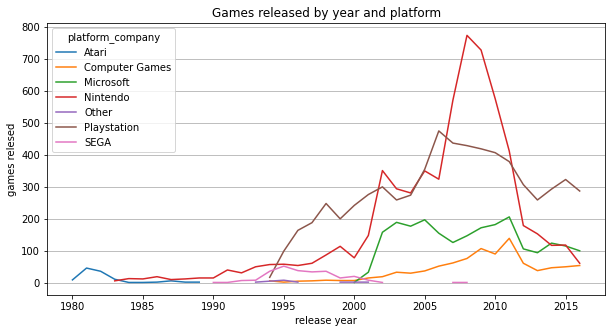

In [41]:
games_by_yr_by_platform = pd.pivot_table(df, index=['release_year'], columns=['platform_company'], values='name', aggfunc='count')
games_by_yr_by_platform.plot(kind='line', alpha=1, figsize=(10,5))
plt.ylabel('games relesed')
plt.xlabel('release year')
plt.title('Games released by year and platform')
plt.grid(True, axis='y')
plt.show()

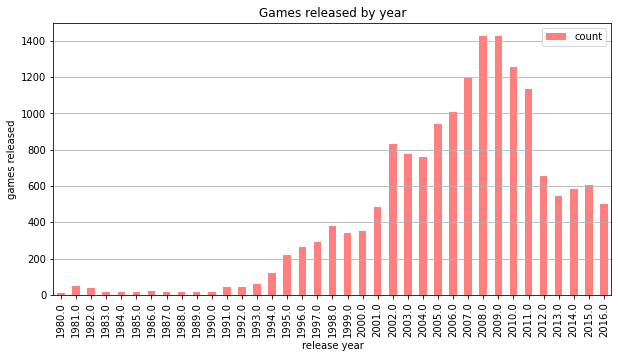

In [42]:
games_by_yr.sort_values(by='count', ascending=False).head(10)
games_by_yr.plot(kind='bar', alpha=0.5, color='red', figsize=(10,5))
plt.ylabel('games released')
plt.xlabel('release year')
plt.title('Games released by year')
plt.grid(True, axis='y')
plt.show()

In [43]:
estimated_platform_release = df.groupby('platform')['release_year'].min()
estimated_platform_release.columns = ['platform', 'release_year']

In [44]:
estimated_platform_release.sort_values()

platform
2600    1980.0
NES     1983.0
DS      1985.0
PC      1985.0
GB      1988.0
SNES    1990.0
GEN     1990.0
GG      1992.0
SCD     1993.0
NG      1993.0
SAT     1994.0
PS      1994.0
3DO     1994.0
TG16    1995.0
PCFX    1996.0
N64     1996.0
DC      1998.0
WS      1999.0
GBA     2000.0
XB      2000.0
PS2     2000.0
GC      2001.0
PSP     2004.0
X360    2005.0
PS3     2006.0
Wii     2006.0
3DS     2011.0
PSV     2011.0
WiiU    2012.0
PS4     2013.0
XOne    2013.0
Name: release_year, dtype: float64

### Game sales distribution by platform

In [45]:
platform_release = df.groupby(['platform_company','platform'])['release_year'].agg('min')
platform_release

platform_company  platform
Atari             2600        1980.0
Computer Games    PC          1985.0
                  PCFX        1996.0
Microsoft         X360        2005.0
                  XB          2000.0
                  XOne        2013.0
Nintendo          3DS         2011.0
                  DS          1985.0
                  GB          1988.0
                  GBA         2000.0
                  GC          2001.0
                  N64         1996.0
                  NES         1983.0
                  SNES        1990.0
                  Wii         2006.0
                  WiiU        2012.0
Other             3DO         1994.0
                  NG          1993.0
                  TG16        1995.0
                  WS          1999.0
Playstation       PS          1994.0
                  PS2         2000.0
                  PS3         2006.0
                  PS4         2013.0
                  PSP         2004.0
                  PSV         2011.0
SEGA       

In [46]:
# platstation slice
playst = df.query("platform_company == 'Playstation'")

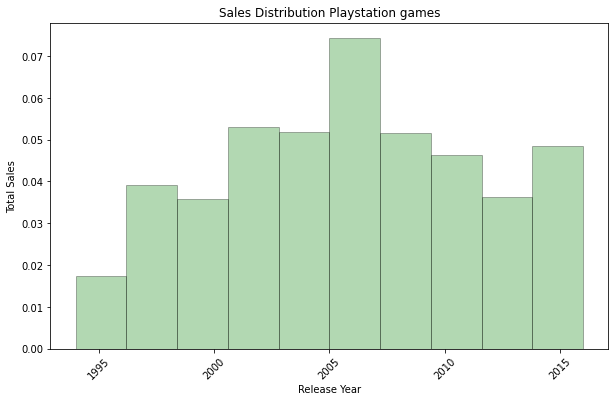

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(playst['release_year'], bins=10, 
         weights=playst['total_sales'], 
         density=True, color='green', 
         alpha=0.3, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Sales Distribution Playstation games')
plt.xticks(rotation=45)
plt.show()

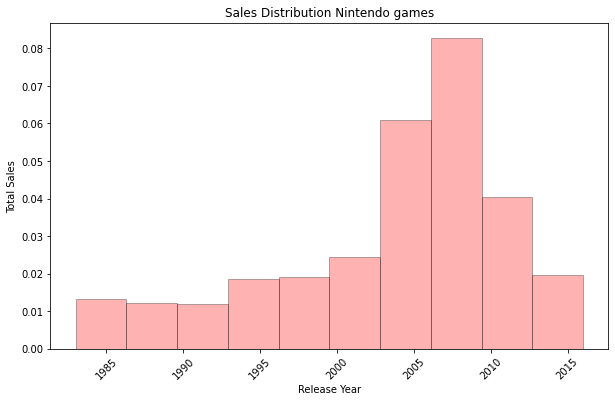

In [48]:
# nintendo slice
ntnd = df.query("platform_company == 'Nintendo'")
#nintendo hist
plt.figure(figsize=(10, 6))
plt.hist(ntnd['release_year'], bins=10, 
         weights=ntnd['total_sales'], 
         density=True, color='red', 
         alpha=0.3, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Sales Distribution Nintendo games')
plt.xticks(rotation=45)
plt.show()

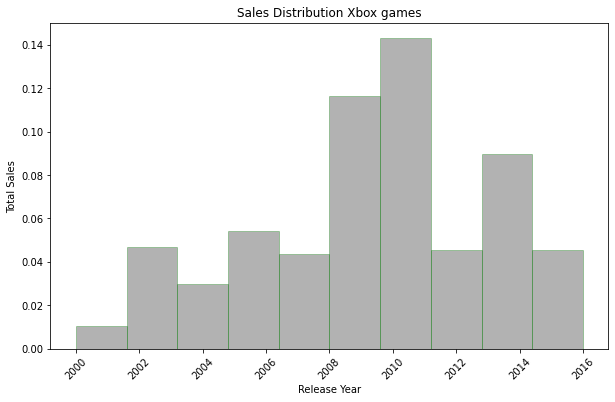

In [49]:
# xbox slice
xbox = df.query("platform_company == 'Microsoft'")
# xbox hist
plt.figure(figsize=(10, 6))
plt.hist(xbox['release_year'], bins=10, 
         weights=xbox['total_sales'], 
         density=True, color='black', 
         alpha=0.3, edgecolor='green')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Sales Distribution Xbox games')
plt.xticks(rotation=45)
plt.show()

### Game sales by individual platforms per company

In [50]:
## Do the same histograms for the individual platforms from chosen companies.

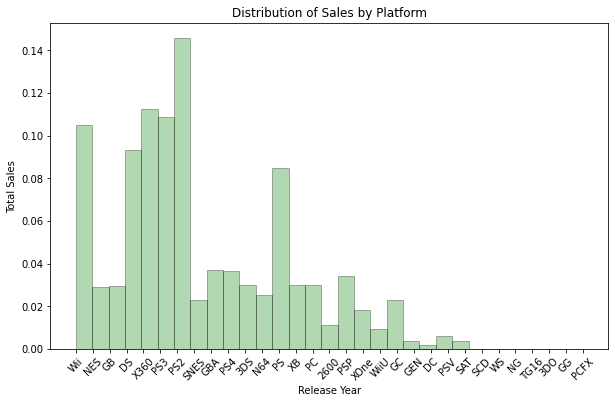

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df['platform'], bins=31, 
         weights=df['total_sales'], 
         density=True, color='green', 
         alpha=0.3, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Distribution of Sales by Platform')
plt.xticks(rotation=45)
plt.show()

In [52]:
df['platform'].nunique()

31

In [53]:
ps2 = df.query("platform == 'PS2'")
X360 = df.query("platform == 'X360'")
ps3 = df.query("platform == 'PS3'")

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(ps2['release_year'], bins=10,
             weights=ps2['total_sales'],
             density=True, color='black',
             alpha=0.3, edgecolor='green')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Sales Distribution PS2 games')

axes[1].hist(X360['release_year'], bins=10,
             weights=X360['total_sales'],
             density=True, color='black',
             alpha=0.3, edgecolor='green')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Total Sales')
axes[1].set_title('Sales Distribution Xbox games')

axes[2].hist(ps3['release_year'], bins=10,
             weights=ps3['total_sales'],
             density=True, color='black',
             alpha=0.3, edgecolor='green')
axes[2].set_xlabel('Release Year')
axes[2].set_ylabel('Total Sales')
axes[2].set_title('Sales Distribution PS3 games')

plt.tight_layout()
plt.show()


#### Distribution of Sales

- The Playstation platform demonstrates a notably symmetric distribution, highlighting consistent sales performance with the release of each new console version. Our analysis of release years revealed a substantial growth in Playstation sales, which continued to escalate with the introduction of new models every six years.
- The sales distribution for Nintendo exhibits a left-skewed pattern, reinforcing our initial observations. Nintendo's sales reached their peak following the launch of the Nintendo Wii and advanced Game Boy consoles, which occurred after 2006 towards the latter portion of the distribution.
- Similiarly, the Xbox game sales exhibited a left-skewed pattern. Notably, the Xbox sales peaked around 2010-2013 coninciding with the release of the Xbox One model.

#### Distribution of Sales by platform

- Based on the distribution charts they console with the most sales in the PS2, PS3, XB360 and Wii. These consoles were release between 2000 and 2013, during this period the games sales started to climb.

With the exception of Playstation it is clear that sales tend to drop after the initial release of the console, particularly if no new models were released. For instance, the firsat Xbox One sales were in 2013 and the first Wii sales were in 2006. Since then both platforms saw a decline in the number of games sold.

#### Top 3 platforms

After conducting an analysis of sales data for the top three platforms, it becomes evident that the sales trajectory of the PS2 experienced a notable decline subsequent to the introduction of the PS3. Furthermore, the sales figures for the PS3 displayed a symmetrical pattern following its initial release, thereby highlighting a concentration of sales primarily within the period spanning from 2010 to 2012.

## Selecting a key period

By segmenting the data and isolating the periods marked by substantial sales, we aim to discern significant insights. Among the distributions analysed, the data for the years after 2010 emerge as a salient candidates. 

This meticulous selection is driven by its discernibly favorable distribution pattern. The purpose behind this strategic maneuver is to craft a prognosis that takes into account the intricate dynamics of a competitive console market, characterized by a multitude of active players and the ebb and flow of console introductions and retirements.

In [55]:
# We're using 2013 as our chosen year.
new_data = df.query('release_year > 2013')
new_data.sort_values(by='release_year').head(5)

name platform  \
5246                                        Thief (2014)      PS3   
6628                                     Just Dance 2015      PS3   
16294        Adventure Time: The Secret of the Nameless      X360   
6678                    Hatsune Miku: Project Diva F 2nd      PS3   
12502  Super Robot Wars OG Saga Masou Kishin F: Coffi...      PS3   

       release_year      genre  na_sales  eu_sales  jp_sales  other_sales  \
5246         2014.0     Action      0.10      0.17      0.02         0.05   
6628         2014.0       Misc      0.13      0.08      0.00         0.04   
16294        2014.0  Adventure      0.01      0.00      0.00         0.00   
6678         2014.0       Misc      0.09      0.03      0.10         0.03   
12502        2014.0   Strategy      0.00      0.00      0.06         0.00   

       critic_score  user_score   rating  platform_release platform_company  \
5246            NaN         NaN  unknown            2006.0      Playstation   
6628            NaN         6.8     E10+            2006.0      Playstation   
16294           NaN         NaN  unknown            2005.0        Microsoft   
6678           78.0         8.6        T            2006.0      Playstation   
12502           NaN         NaN  unknown            2006.0      Playstation   

       total_sales  
5246          0.34  
6628          0.25  
16294         0.01  
6678          0.25  
12502         0.06

Using our newly formulated data we will produce a box plot and try to determine more about the variance, median and how many outliers we have.

In [56]:
new_data['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

In [57]:
global_sales =new_data.groupby(['platform','name'])['total_sales'].sum().reset_index()
global_sales.columns = ['platform', 'name', 'global_sales']
global_sales.sort_values(by='global_sales', ascending=False).head()

platform                                       name  global_sales
625      PS4                  Call of Duty: Black Ops 3         14.63
712      PS4                         Grand Theft Auto V         12.62
140      3DS  Pokemon Omega Ruby/Pokemon Alpha Sapphire         11.68
686      PS4                                    FIFA 16          8.58
869      PS4               Star Wars Battlefront (2015)          7.98

In [58]:
global_sales =new_data.groupby(['platform'])['total_sales'].sum().reset_index()
global_sales.columns = ['platform', 'global_sales']
global_sales.sort_values(by='global_sales', ascending=False).head()

platform  global_sales
3      PS4        288.15
9     XOne        140.36
0      3DS         86.68
2      PS3         68.18
8     X360         48.22

Text(0.5, 1.0, 'Global Sales by Platform')

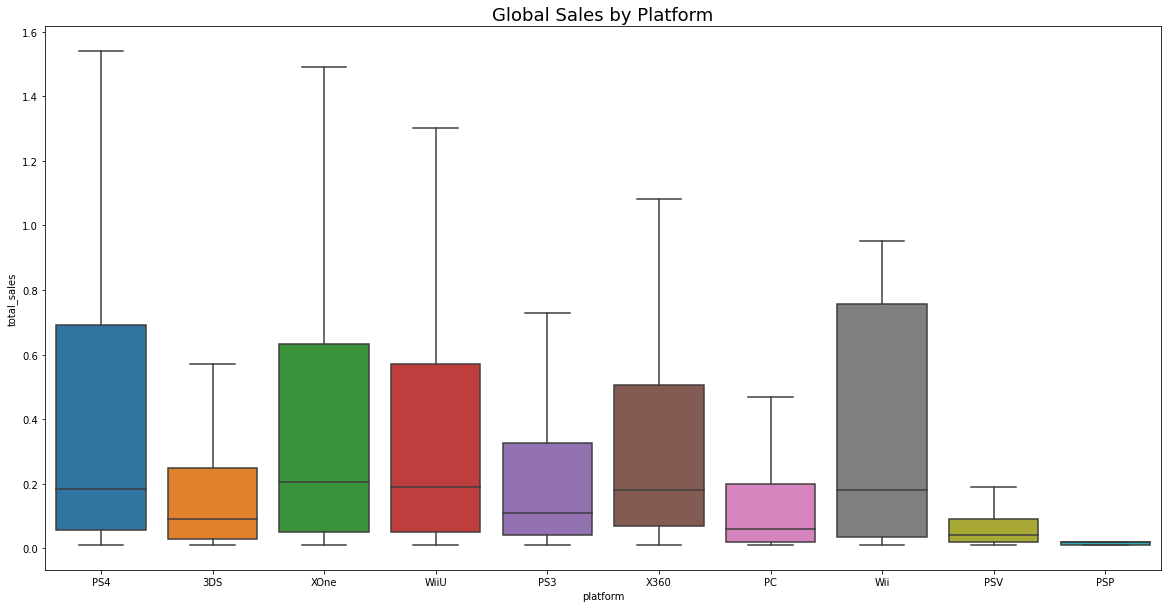

In [59]:
plt.figure(figsize=(20,10))
sns.boxplot(x='platform',y='total_sales',data=new_data, showfliers=False)
plt.title('Global Sales by Platform', fontsize=18)

Preliminary findings gleaned from the boxplot analysis reveal intriguing insights. It is evident that individual game titles have not amassed more than two purchases, indicating limited popularity or demand.. 

Notably, the analysis highlights the PS4 platform as exhibiting the highest degree of game variety, with notable instances of individuals acquiring over 200 games for this particular console. This affirms the robustness and breadth of the PS4 game library, potentially contributing to its enduring appeal among consumers.

### Conclusions

To summarise what was written above here are our current findings from the dataset.

- Nintendo sales follow a left-skewed distribution indicating that sales peak after 2006. The variance (4.3) is high though, which indicates a wider range of sales, which is understandable as Nintendo have the highest number of consoles spreading as far back as the 1980s.

- Playstation sales have a more balanced distribution as their models were released approximetely every 6 years from the 90s. The varianced is lower (0.53) which suggests that differencial performance between playstation models.

- Xbox sales have a similiar distribution to Nintendo as their game sales only came after 2000 with a variance of 1.24, there is wide range of sales of the last 20 years, however, there are only 3 consoles by Microsoft which keeps the variance at a lower position than Nintendo.

In summary, the analysis reveals distinct sales patterns for Nintendo, PlayStation, and Xbox consoles. Nintendo's sales peaked after the release of the Nintendo Wii and advanced Game Boy consoles. PlayStation's sales grew consistently with each new console release, while further analysis is needed to fully understand Xbox sales. The variance of total sales shows that Nintendo has the widest range of sales figures.

Our next steps:

- look at the sales figures alongside user and critic reviews to determine whether reviews have impacts on the total number of sales.

## Popularity vs. Total Sales

Displaying general information about the review columns to understand the distribution. 

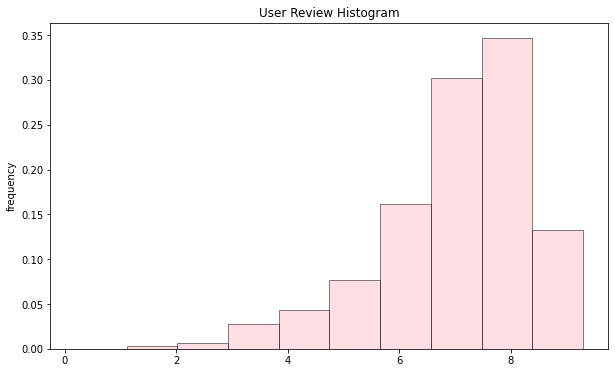

In [60]:
# Check distribution of user reviews
plt.figure(figsize=(10, 6))
plt.hist(new_data['user_score'], bins=10, weights=new_data['user_score'], 
          density=True, color='pink', alpha=0.5, edgecolor='black')
plt.title('User Review Histogram')
plt.ylabel('frequency')
plt.show()

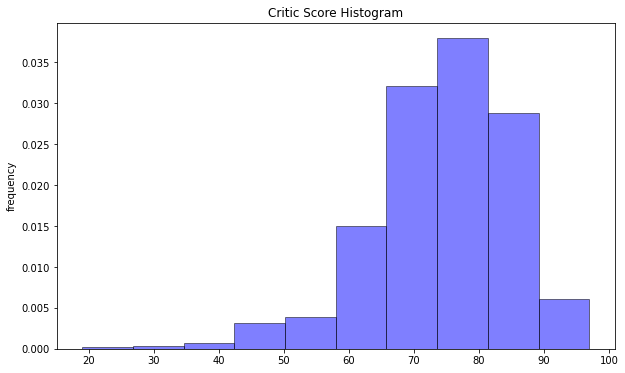

In [61]:
# check distribution of critic reviews
plt.figure(figsize=(10, 6))
plt.hist(new_data['critic_score'], bins=10, weights=new_data['critic_score'], 
          density=True, color='blue', alpha=0.5, edgecolor='black')
plt.title('Critic Score Histogram')
plt.ylabel('frequency')
plt.show()

In [62]:
performance_table = pd.pivot_table(new_data, index=['platform','name'], 
                                   values=['user_score','critic_score'],
                                  aggfunc=['median'])
performance_table.columns = ['med_critic_score','med_user_score']
performance_table.head()

med_critic_score  \
platform name                                                                   
3DS      7th Dragon III Code: VFD                                        77.0   
         A-Train: City Simulator                                         65.0   
         Adventure Time: The Secret of the Nameless Kingdom              65.0   
         Animal Crossing: Happy Home Designer                            66.0   
         Azure Striker Gunvolt                                           77.0   

                                                             med_user_score  
platform name                                                                
3DS      7th Dragon III Code: VFD                                       8.2  
         A-Train: City Simulator                                        NaN  
         Adventure Time: The Secret of the Nameless Kingdom             5.6  
         Animal Crossing: Happy Home Designer                           6.9  
         Azure Striker Gunvolt                                          8.4

In [63]:
total_sales_platform = pd.pivot_table(new_data, index=['platform','name'], 
                                   values=['total_sales'],
                                  aggfunc=['sum'])
total_sales_platform.columns = ['total_sales']

In [64]:
merged_reviews = pd.merge(left = performance_table, 
                          right = total_sales_platform,
                         on=['platform','name'],
                         how='left')

In [65]:
top_10_sales_reviews = merged_reviews.sort_values(by='total_sales', ascending=False).head(10)
top_10_sales_reviews

med_critic_score  med_user_score  \
platform name                                                               
PS4      Grand Theft Auto V                          97.0             8.3   
         FIFA 16                                     82.0             4.3   
         Call of Duty: Advanced Warfare              83.0             5.7   
         FIFA 17                                     85.0             5.0   
         Fallout 4                                   87.0             6.5   
WiiU     Mario Kart 8                                88.0             9.1   
PS4      FIFA 15                                     82.0             5.7   
         Destiny                                     76.0             6.1   
XOne     Grand Theft Auto V                          97.0             7.9   
PS4      Uncharted 4: A Thief's End                  93.0             7.9   

                                         total_sales  
platform name                                         
PS4      Grand Theft Auto V                    12.62  
         FIFA 16                                8.58  
         Call of Duty: Advanced Warfare         7.66  
         FIFA 17                                7.60  
         Fallout 4                              7.17  
WiiU     Mario Kart 8                           7.09  
PS4      FIFA 15                                6.08  
         Destiny                                5.64  
XOne     Grand Theft Auto V                     5.47  
PS4      Uncharted 4: A Thief's End             5.39

In [66]:
bottom_10_sales_reviews = merged_reviews.sort_values(by='total_sales', ascending=True).head(10)
bottom_10_sales_reviews

med_critic_score  med_user_score  \
platform name                                                                
PS4      Root Letter                                  69.0             7.5   
XOne     Assetto Corsa                                63.0             6.7   
PC       Cities: Skylines Snowfall                    72.0             7.1   
PSV      Xblaze: Lost Memories                         NaN             7.0   
         SpongeBob: HeroPants                          NaN             5.1   
PS3      Don Bradman Cricket 14                       73.0             6.9   
PC       Battle Worlds: Kronos                        71.0             7.1   
PSV      MotoGP 14                                     NaN             7.5   
XOne     Darksiders: Warmastered Edition              80.0             7.9   
PSV      MLB 15: The Show                              NaN             8.8   

                                          total_sales  
platform name                                          
PS4      Root Letter                             0.01  
XOne     Assetto Corsa                           0.01  
PC       Cities: Skylines Snowfall               0.01  
PSV      Xblaze: Lost Memories                   0.01  
         SpongeBob: HeroPants                    0.01  
PS3      Don Bradman Cricket 14                  0.01  
PC       Battle Worlds: Kronos                   0.01  
PSV      MotoGP 14                               0.01  
XOne     Darksiders: Warmastered Edition         0.01  
PSV      MLB 15: The Show                        0.01

Based on our analysis of the most popular games we will select 3 popular platforms and perform a scatter chart in order to determine the correlation between the professional reviews, user reviews and the number of sales.

We will use:

- XBOne
- PS4
- PC

In [67]:
ps4 = new_data.query("platform == 'PS4'")
pc = new_data.query("platform == 'PC'")
xb = new_data.query("platform == 'XOne'")

Text(0.5, 1.0, 'Relationship between Critic Score and Sales')

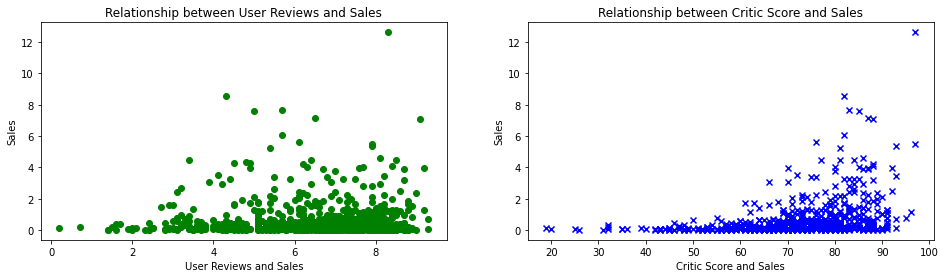

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].scatter(new_data['user_score'], 
            new_data['total_sales'],
            c='green',
            marker='o')
axes[0].set_xlabel('User Reviews and Sales')
axes[0].set_ylabel('Sales')
axes[0].set_title('Relationship between User Reviews and Sales')

axes[1].scatter(new_data['critic_score'], 
            new_data['total_sales'],
            c='blue',
            marker='x')
axes[1].set_xlabel('Critic Score and Sales')
axes[1].set_ylabel('Sales')
axes[1].set_title('Relationship between Critic Score and Sales')


In [69]:
selected_columns = ['user_score', 'critic_score', 'total_sales']

ps4_not_na = ps4[selected_columns].dropna()
correlation_PS4 = ps4_not_na.corr()
XB_not_na = xb[selected_columns].dropna()
correlation_xb = XB_not_na.corr()
pc_not_na = pc[selected_columns].dropna()
correlation_pc = pc_not_na.corr()

In [70]:
print("ps4 correlation", correlation_PS4)
print()
print("xbone correlation", correlation_xb)
print()
print("pc correlation", correlation_pc)

ps4 correlation               user_score  critic_score  total_sales
user_score      1.000000      0.546434    -0.043186
critic_score    0.546434      1.000000     0.401903
total_sales    -0.043186      0.401903     1.000000

xbone correlation               user_score  critic_score  total_sales
user_score      1.000000      0.440977    -0.091734
critic_score    0.440977      1.000000     0.422112
total_sales    -0.091734      0.422112     1.000000

pc correlation               user_score  critic_score  total_sales
user_score      1.000000      0.466099    -0.089974
critic_score    0.466099      1.000000     0.172061
total_sales    -0.089974      0.172061     1.000000


### Conclusions

The correlation analysis reveals key insights regarding the impact of critic and user scores on total sales across the most impactful platforms (Playstation 4, Xbox One and Computer). Here are the key findings:

- Both critic scores and user scores exhibit discernible associations with total sales, indicating their significance in influencing game sales performance.
- Across the platforms, there is a moderate positive correlation between user scores and critic scores, suggesting a general alignment between the opinions of users and professional critics.
- Xbox One stands out with a relatively stronger positive correlation between critic scores and total sales compared to the other platforms, implying that critic scores may have a greater influence on game sales for this platform.
- While user scores also contribute to the sales performance, the analysis suggests that the opinions of professional critics may hold slightly more weight in impacting the overall sales figures.

Overall, understanding the interplay between critic and user scores is crucial for game developers and publishers seeking to optimize sales strategies and cater to the preferences of both critics and users.

## Distribution of games by genre

In [71]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [72]:
games_by_genre = pd.pivot_table(new_data, index=['genre'], values=['total_sales'],aggfunc='sum')
games_by_genre.columns = ['total_sales_genre']
games_by_genre.sort_values(by='total_sales_genre', ascending=False)

total_sales_genre
genre                          
Action                   199.36
Shooter                  170.94
Sports                   109.48
Role-Playing             101.44
Misc                      37.55
Fighting                  28.22
Racing                    27.52
Platform                  18.09
Adventure                 17.55
Simulation                13.13
Strategy                   3.96
Puzzle                     2.21

In [73]:
plt.figure(figsize=(20,10))
sns.boxplot(x='genre',y='total_sales',data=new_data, showfliers=False)
plt.title('Global Sales by Genre', fontsize=18)

Text(0.5, 1.0, 'Global Sales by Genre')

### Conclusions
From observations we can determine that the key genres at Ice Gaming are sports, shooter and platform games. The games that had the most outliers tended to be the shooter games as there were more higher quantity sales.

## Regional Profiles

### Sales by Region

In this section, I conducted an analysis to determine various aspects of the gaming industry across different regions. Here is a summary of the steps I took and the findings:

- Step 1: I created an informative bar chart showcasing the total sales, providing a broad overview of the data.

- Step 2: I grouped the data by region and platform, identifying the top five platforms in each region. I examined the variations in market shares among these platforms across different regions, highlighting any notable differences.

- Step 3: I merged the three separate dataframes representing the regions (NA, EU, JP) to create a comprehensive dataset.

- Step 4: Utilizing the merged data, I calculated the percentage share of sales for each platform in the respective regions, enabling a more precise understanding of market distribution.

- Step 5: To assess the impact of ESRB ratings on sales in individual regions, I grouped the data by rating and the three sales regions. I then calculated the percentage of sales associated with each rating in each region.

- Step 6: Additionally, I grouped the data by genre and the three sales regions, calculating the percentage of sales for each genre in each region.

Based on these analyses, I was able to identify and present the top five platforms and genres in each region. Furthermore, I explored the relationship between ESRB ratings and sales, offering insights into whether there were any discernible effects on sales in specific regions.

In [74]:
new_data.columns

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'platform_release', 'platform_company', 'total_sales'],
      dtype='object')

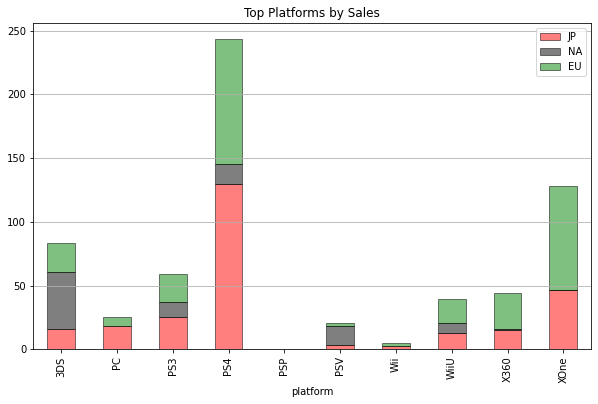

In [75]:
top_platforms_sales = pd.pivot_table(new_data, index='platform', values=['jp_sales','na_sales','eu_sales'], aggfunc='sum')
top_platforms_sales.columns = ['jp_sales','na_sales','eu_sales']
top_platforms_sales.plot(kind='bar', alpha=0.5, color=['red', 'black', 'green'],figsize=(10,6), edgecolor='black', stacked=True)
plt.grid(True, axis='y')
plt.title('Top Platforms by Sales')
plt.legend(['JP', 'NA', 'EU'])

In [76]:
na=new_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

platform  na_sales
3      PS4     98.61
9     XOne     81.27
8     X360     28.30
0      3DS     22.64
2      PS3     22.05

In [77]:
jp=new_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

platform  jp_sales
0      3DS     44.24
3      PS4     15.02
5      PSV     14.54
2      PS3     11.22
7     WiiU      7.31

In [78]:
eu=new_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

platform  eu_sales
3      PS4    130.04
9     XOne     46.25
2      PS3     25.54
1       PC     17.97
0      3DS     16.12

Before we looked at the total sales all together, now we will look at the total sales by region and country and determine which platforms are most popular by region. Based on the above chart we can determine that Europe is the biggest market for Ice's video game sales, followed by the Japenese market. The platforms with the most game sales were the Wii, Xbox 360 and Playstation consoles.

### Top genres by region

In [79]:
top_genres_region = pd.pivot_table(new_data, index='genre', values=['jp_sales','na_sales','eu_sales'], aggfunc='sum')
top_genres_region

eu_sales  jp_sales  na_sales
genre                                     
Action           74.68     29.58     72.53
Adventure         6.49      3.60      5.64
Fighting          6.69      6.37     12.43
Misc             12.86      5.61     15.05
Platform          6.80      2.69      6.79
Puzzle            0.52      0.93      0.65
Racing           14.13      1.76      8.74
Role-Playing     28.17     31.16     33.47
Shooter          65.52      4.87     79.02
Simulation        7.30      2.31      2.63
Sports           45.73      3.26     46.13
Strategy          1.79      0.95      0.98

In [80]:
top_genres_region['jp_sales%'] = top_genres_region['jp_sales'] / top_genres_region['jp_sales'].sum()
top_genres_region['na_sales%'] = top_genres_region['na_sales'] / top_genres_region['na_sales'].sum()
top_genres_region['eu_sales%'] = top_genres_region['eu_sales'] / top_genres_region['eu_sales'].sum()                                                                  
top_genres_region

eu_sales  jp_sales  na_sales  jp_sales%  na_sales%  eu_sales%
genre                                                                      
Action           74.68     29.58     72.53   0.317757   0.255333   0.275898
Adventure         6.49      3.60      5.64   0.038672   0.019855   0.023977
Fighting          6.69      6.37     12.43   0.068428   0.043758   0.024716
Misc             12.86      5.61     15.05   0.060264   0.052982   0.047510
Platform          6.80      2.69      6.79   0.028897   0.023903   0.025122
Puzzle            0.52      0.93      0.65   0.009990   0.002288   0.001921
Racing           14.13      1.76      8.74   0.018906   0.030768   0.052202
Role-Playing     28.17     31.16     33.47   0.334730   0.117827   0.104071
Shooter          65.52      4.87     79.02   0.052315   0.278181   0.242057
Simulation        7.30      2.31      2.63   0.024815   0.009259   0.026969
Sports           45.73      3.26     46.13   0.035020   0.162395   0.168945
Strategy          1.79      0.95      0.98   0.010205   0.003450   0.006613

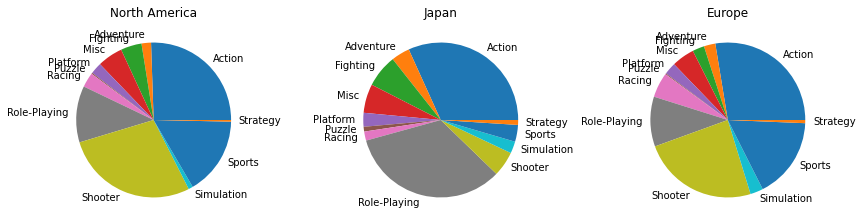

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].pie(top_genres_region['na_sales'], labels=top_genres_region.index)
axes[0].set_title('North America')

axes[1].pie(top_genres_region['jp_sales'], labels=top_genres_region.index)
axes[1].set_title('Japan')

axes[2].pie(top_genres_region['eu_sales'], labels=top_genres_region.index)
axes[2].set_title('Europe')

plt.rcParams.update({'font.size': 8})
plt.tight_layout(pad=1)

### ESRB Rating by Region

In [82]:
rating_region = pd.pivot_table(new_data, index='rating', values=['jp_sales','na_sales','eu_sales'], aggfunc='sum')
rating_region['jp_sales%'] = rating_region['jp_sales'] / rating_region['jp_sales'].sum()
rating_region['na_sales%'] = rating_region['na_sales'] / rating_region['na_sales'].sum()
rating_region['eu_sales%'] = rating_region['eu_sales'] / rating_region['eu_sales'].sum()
rating_region

eu_sales  jp_sales  na_sales  jp_sales%  na_sales%  eu_sales%
rating                                                                
E           58.06      8.94     50.74   0.096036   0.178624   0.214497
E10+        26.16      4.46     33.23   0.047911   0.116982   0.096645
M           93.44      8.01     96.42   0.086046   0.339435   0.345205
T           34.07     14.78     38.95   0.158771   0.137119   0.125868
unknown     58.95     56.90     64.72   0.611236   0.227839   0.217785

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), subplot_kw=dict(aspect="equal"))

axes[0].pie(rating_region['na_sales'], labels=rating_region.index)
axes[0].set_title('North America')

axes[1].pie(rating_region['jp_sales'], labels=rating_region.index)
axes[1].set_title('Japan')

axes[2].pie(rating_region['eu_sales'], labels=rating_region.index)
axes[2].set_title('Europe')

plt.rcParams.update({'font.size': 12})
plt.tight_layout(pad=5)

## Testing Hypothesis

### Average user ratings of the Xbox One and PC platforms are the same.

In [84]:
new_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [85]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1689 non-null   object 
 1   platform          1689 non-null   object 
 2   release_year      1689 non-null   float64
 3   genre             1689 non-null   object 
 4   na_sales          1689 non-null   float64
 5   eu_sales          1689 non-null   float64
 6   jp_sales          1689 non-null   float64
 7   other_sales       1689 non-null   float64
 8   critic_score      718 non-null    float64
 9   user_score        888 non-null    float64
 10  rating            1689 non-null   object 
 11  platform_release  1689 non-null   float64
 12  platform_company  1689 non-null   object 
 13  total_sales       1689 non-null   float64
dtypes: float64(9), object(5)
memory usage: 262.5+ KB


In [86]:
review_only = new_data.dropna(subset=['user_score'])

In [87]:
computer_review = review_only.loc[df['platform'] == 'PC','user_score']
xbox_review = review_only.loc[df['platform'] == 'XOne', 'user_score']

In [88]:
xbox_review

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [89]:
computer_review.head()

458     3.9
1530    5.4
1730    7.9
2303    5.7
2784    5.9
Name: user_score, dtype: float64

In [90]:
null_hypothesis = "Average user ratings of the Xbox One and PC platforms are the same."
alternative_hypothesis = "The average ratings for xbox and pc are different."

alpha = 0.05

results = stats.ttest_ind(xbox_review, computer_review)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

p-value: 0.10450507919348415
We can't reject the null hypothesis.


### Average user ratings for the action and sports genres are different.

In [91]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [92]:
action = review_only.loc[df['genre'] == 'Action','user_score']
sports = review_only.loc[df['genre'] == 'Sports', 'user_score']

In [93]:
null_hypothesis = " Average user ratings for the action and aports genres are different."
alternative_hypothesis = "The average ratings for action and sports genres are the same."

alpha = 0.05

results = stats.ttest_ind(sports, action)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

p-value: 2.8711147985105864e-19
We reject the null hypothesis.


### Statistical Analysis

Based on the statistical analysis conducted with a p-value of 0.1045, we are unable to reject the null hypothesis, which posits that the average user ratings of the Xbox One and PC platforms are equivalent. 

Consequently, there is insufficient compelling evidence to indicate any significant disparity in the average ratings between Xbox and PC. Further investigation may be warranted to explore additional factors that could influence user ratings.

Moreover, the statistical test of hypothesis two resulted in a p-value of 2.87 indicated that we can reject the null hypothesis because the user ratings for both genres are the same.

## Summary of Key Findings

The correlation analysis conducted on the dataset provides ICE Gaming with valuable insights into the influence of critic and user scores on total sales across prominent gaming platforms. 

Key findings reveal that both critic scores and user scores exhibit discernible associations with total sales, indicating their significance in driving game sales performance. Additionally, there is a moderate positive correlation between user scores and critic scores across the platforms, suggesting a general alignment between user opinions and professional critics.

After sampling the data, among the most popular platforms, Xbox One stands out with a relatively stronger positive correlation between critic scores and total sales, indicating that critic scores may have a greater impact on game sales for this platform. 

While user scores also contribute to sales performance, our analysis suggests that professional critics' opinions may carry slightly more weight in influencing overall sales figures. Understanding the interplay between critic and user scores is crucial for game developers and publishers seeking to optimize sales strategies and cater to the preferences of both critics and users. By considering these insights, ICE stakeholders will be able to make decisions regarding marketing campaigns and future procurement.

Furthermore, an analysis of sales patterns across different consoles reveals distinct trends. Nintendo's sales peaked after the release of the Nintendo Wii and advanced Game Boy consoles, while PlayStation's sales demonstrated consistent growth with each new console release. It is also noteworthy that Nintendo exhibits the widest range of sales figures, indicated by a higher variance in total sales, thus emphasising that a consoles lifespan isn't long and that innovation is critical for gaming providers and retailers alike. There is no point sitting on a warehouse full of stock if no one is buying the console anymore.

### Recommendations for future growth:

1. Leveraging Critic Scores: ICE should ensure that critic scores are used in there marketing campaigns for games and they must be placed on POS material instore and online.

2. Understanding User Opinions: While critic scores hold influence, user opinions are also crucial in shaping sales. It is recommended that ICE actively engage with the gaming community, gather user feedback. This will help to increase the sales potential when new games are released.

3. Console-Specific Strategies: Considering the unique sales patterns of each platform, ICE should tailor their marketing and promotional efforts to target specific console audiences. This includes highlighting console-exclusive features, leveraging platform-specific marketing channels, and adapting game designs to match the preferences of each platform's user base.

In conclusion, the analysis highlights the significance of critic and user scores in influencing game sales performance across different gaming platforms. Understanding these dynamics, ICE can make informed decisions, leverage critic scores, engage with users, and devise console-specific strategies to maximize sales potential. By incorporating these recommendations, ICE can enhance their market position and capitalize on the preferences of both critics and users in the competitive gaming industry.